<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/OPTIMIZATION/Simulated_Annealing_(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [190]:
def boltzmann(deltaE,  T, k=1):
  return np.exp(-deltaE/(k*T))

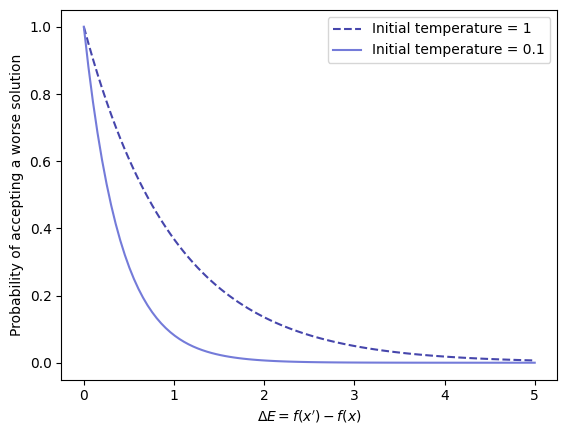

In [191]:
Ti = 100
energies = np.linspace(0,5,100)
probabilities = [boltzmann(energy, 1, k=1) for energy in energies]
probabilities_ = [boltzmann(energy, 0.1, k=4) for energy in energies]
plt.plot(energies, probabilities, label='Initial temperature = 1', color='#4646AC', linestyle='dashed')
plt.plot(energies, probabilities_, label='Initial temperature = 0.1', color='#747BD9')
plt.ylabel("Probability of accepting a worse solution")
plt.xlabel("$\Delta E =  f(x') - f(x)$")
plt.legend()
plt.savefig("BoltzmanDistribution.eps")

Solve the following  problem:

\begin{equation}
f(x) = 81x - 1.5x^{2} - 1000
\end{equation}

\begin{equation}
f'(x) = 81 - 3x
\end{equation}


Therefore the analytical solution is:
\begin{equation}
x^{*} = 27
\end{equation}



We are going to uses **simulated annealing**.

In [192]:
def fitness(x):
  return 81*x[0] - (1.5)*(x[0]**2) - 1000,

In [193]:
fitness([27])

(93.5,)

In [194]:
# Module of Simulated Anealing Fitness Function...

import numpy as np
import random

#####################################
# Simulated annealing               #
#####################################
def search(solution, alpha=0.01):
  return solution + np.random.randn(len(solution)) * alpha



def boltzmann(deltaE,  T, k=1):
  return np.exp(deltaE/(k*T)) # drop negative to maximize..


def SA(solution, search,
         Ti,
         Tf,
         cooling_rate,
         fitnessFunction,
         seed=123,
         reduce_temp=0.01,
         alpha=0.01):
  #print('initial  fitness:',fitnessFunction(solution))
  record = {}
  record['Major'] = (fitnessFunction(solution), solution)
  T = Ti
  while T>Tf:
    for _ in range(cooling_rate):
      solution_temp  = search(solution, alpha=alpha)
      E0, E1 = fitnessFunction(solution)[0], fitnessFunction(solution_temp)[0]
      if E1 >= E0 or random.uniform(0,1) < boltzmann(E1-E0, T):
        solution = solution_temp
      if fitnessFunction(solution)[0] > record['Major'][0][0]:
           record['Major'] = (fitnessFunction(solution), solution)
    T = T - reduce_temp
    print(fitnessFunction(solution))
  return record # dictionary

In [195]:
SA(solution = [1],
   search=search,
   Ti =50,
   Tf = 0,
   cooling_rate=25,
   reduce_temp=0.01,
   alpha = 0.5,
   fitnessFunction = fitness)

Streaming output truncated to the last 5000 lines.
(-556.9807617218114,)
(-401.479155080174,)
(-244.2968733034793,)
(-225.36847527222267,)
(-30.445760954062052,)
(-51.2695810745214,)
(81.57947758185128,)
(90.44765347232192,)
(93.29007312549925,)
(72.28853883360603,)
(37.06875527067973,)
(-27.04142102569415,)
(-95.40788268206495,)
(-46.324352395645064,)
(-35.72509542132809,)
(-16.838893563585316,)
(-28.343312238677868,)
(-30.272791305200144,)
(41.249775049356685,)
(76.74370687417786,)
(87.85833875414573,)
(90.6683468400579,)
(87.99005648699767,)
(93.49985472589924,)
(54.005429184949435,)
(17.611888944197744,)
(64.1739102752797,)
(57.851105175444445,)
(91.79299446064806,)
(89.71326694448817,)
(76.84000838376824,)
(46.38414398669602,)
(59.381836330673195,)
(92.97452779763353,)
(91.07906201798005,)
(89.18470066999612,)
(92.70865538911221,)
(93.12784590306751,)
(88.70065802436852,)
(92.5270146452167,)
(93.49059697619828,)
(82.40645286318409,)
(73.13021007067027,)
(93.17349538942426,)
(88.31

{'Major': ((93.49999999766737,), array([26.99996057]))}

In [197]:
exp_results = []
trials  = 25
for trial in range(trials):
  results = SA(solution = [1],
   search=search,
   Ti =20,
   Tf = 0,
   cooling_rate=25,
   reduce_temp=0.01,
   alpha = 0.5,
   fitnessFunction = fitness)
  results
  exp_results.append(results['Major'][1][0])


Streaming output truncated to the last 5000 lines.
(92.69520400838724,)
(84.6653189216911,)
(87.03114023441526,)
(93.27865449845694,)
(93.32474845326533,)
(93.24999400028605,)
(92.08140383268346,)
(89.93155882226347,)
(93.11581938818449,)
(92.96513078742419,)
(81.6388920786917,)
(86.86403065886589,)
(88.24499081266504,)
(90.64502304867824,)
(91.0775865672324,)
(91.95446858015544,)
(92.34467504194913,)
(93.14616618108334,)
(92.2172758453396,)
(93.36026697404986,)
(84.03296712251313,)
(92.0439536740405,)
(92.89646340747481,)
(87.98263483703272,)
(93.33413437407808,)
(86.76911802998075,)
(92.75269715592276,)
(90.69940643635573,)
(93.44784528641662,)
(92.87010885738596,)
(91.31126062852377,)
(86.11403177575721,)
(87.47391862276982,)
(92.46224893245358,)
(89.25156588276195,)
(91.766006089847,)
(93.39097901157174,)
(89.35597282765548,)
(92.6469271981914,)
(93.47598531017684,)
(92.44661731914175,)
(89.64930074684389,)
(85.2450244399131,)
(92.95592632518355,)
(93.25131495781034,)
(74.104689540

In [198]:
np.array(exp_results).mean()

26.999987289875477

In [199]:
# Maximize a function of form.
def f(x,y, C=100):
  return np.sqrt(C - (x**2) - (y**2))

def f_array(sol, C=100):
    x, y = sol[0], sol[1]
    return max(C - (x ** 2) - (y ** 2), 0),  # Ensuring non-negative argument


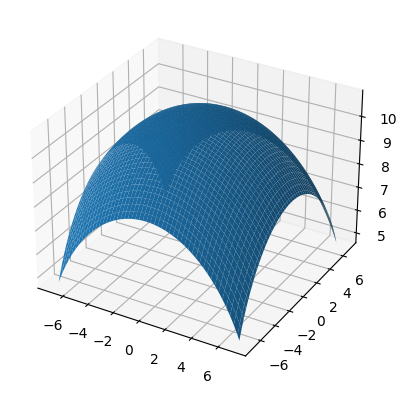

In [200]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.linspace(-7,7,100)
y = np.linspace(-7,7,100)
x, y = np.meshgrid(x,y)
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, f(x,y,120))
plt.show()

In [216]:
SA(solution = [6,5],
   search=search,
   Ti =50,
   Tf = 0,
   cooling_rate=30,
   reduce_temp=0.01,
   alpha = 0.01,
   fitnessFunction = f_array)

Streaming output truncated to the last 5000 lines.
(39.92889095601684,)
(41.16963860954714,)
(41.71581811748264,)
(40.619662102912216,)
(40.930737482472054,)
(41.12377615575326,)
(42.41110804029647,)
(43.130223825087256,)
(43.87905407939199,)
(42.5840270135,)
(43.32241233603653,)
(42.304618374765525,)
(44.19505242565232,)
(45.13754918543328,)
(45.31762665869162,)
(44.73792018376558,)
(44.27151237415545,)
(45.90608960804069,)
(47.63444664317056,)
(46.40268345635896,)
(47.68311061077513,)
(47.566065467797,)
(48.53649057411652,)
(50.80177898501435,)
(51.66657012416651,)
(50.667313025463386,)
(51.24583933579912,)
(51.8208926922537,)
(51.21723804317452,)
(50.85189732921765,)
(50.34544989256587,)
(51.34366329107448,)
(51.61383403084143,)
(51.07642361404615,)
(51.30713726225149,)
(51.5552572276421,)
(51.05589026403207,)
(50.80597689009056,)
(52.629777953405586,)
(52.42383478214754,)
(53.6104438613103,)
(54.06487467036195,)
(53.50765727438295,)
(54.06966550334296,)
(53.122693468419655,)
(52.96

{'Major': ((98.85373038566155,), array([0.79717851, 0.71468597]))}